In [ ]:
import pandas as pd
from prophet import Prophet
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

In [ ]:
df_test=pd.read_csv("DailyDelhiClimateTest.csv")
df_train=pd.read_csv("DailyDelhiClimateTrain.csv")
df=df_train
df_train

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [ ]:
len(df_test)

114

In [ ]:
len(df_train)

1462

In [ ]:
df_test

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333
...,...,...,...,...,...
109,2017-04-20,34.500000,27.500000,5.562500,998.625000
110,2017-04-21,34.250000,39.375000,6.962500,999.875000
111,2017-04-22,32.900000,40.900000,8.890000,1001.600000
112,2017-04-23,32.875000,27.500000,9.962500,1002.125000


In [ ]:
df_train.head(5)

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


# Uni-Variate Forecasting

In [ ]:
df_train = df_train.rename(columns={'meantemp': 'y', 'date':'ds'})
df_train['y_orig'] = df_train['y'] # to save a copy of the original data..you'll see why shortly.
df_train['y'] = np.log(df_train['y'])


In [ ]:
df_train.head(5)

,ds,y,humidity,wind_speed,meanpressure,y_orig
0,2013-01-01,2.302585,84.500000,0.000000,1015.666667,10.000000
1,2013-01-02,2.001480,92.000000,2.980000,1017.800000,7.400000
2,2013-01-03,1.969441,87.000000,4.633333,1018.666667,7.166667
3,2013-01-04,2.159484,71.333333,1.233333,1017.166667,8.666667
4,2013-01-05,1.791759,86.833333,3.700000,1016.500000,6.000000


In [ ]:
model = Prophet() #instantiate Prophet
model.fit(df_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbzr_1riw/kk207tin.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbzr_1riw/p3epe_gy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30696', 'data', 'file=/tmp/tmpbzr_1riw/kk207tin.json', 'init=/tmp/tmpbzr_1riw/p3epe_gy.json', 'output', 'file=/tmp/tmpbzr_1riw/prophet_modelg8d04_nl/prophet_model-20250807121834.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:18:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:18:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
''' 'year': 'A',
        'quarter': 'Q',
        'month': 'M',
        'day': 'D',
        'hour': 'H',
        'minute': 'T',
        'second': 'S',
        'millisecond': 'L',
        'microsecond': 'U',
        'nanosecond': 'N'}
'''


future_data = model.make_future_dataframe(periods=113, freq = 'D')

forecast_data = model.predict(future_data)

forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
1570,2017-04-20,3.553281,3.436893,3.678354
1571,2017-04-21,3.557056,3.427495,3.685480
1572,2017-04-22,3.557339,3.432069,3.681901
1573,2017-04-23,3.556711,3.432787,3.690015
1574,2017-04-24,3.573972,3.447293,3.697015


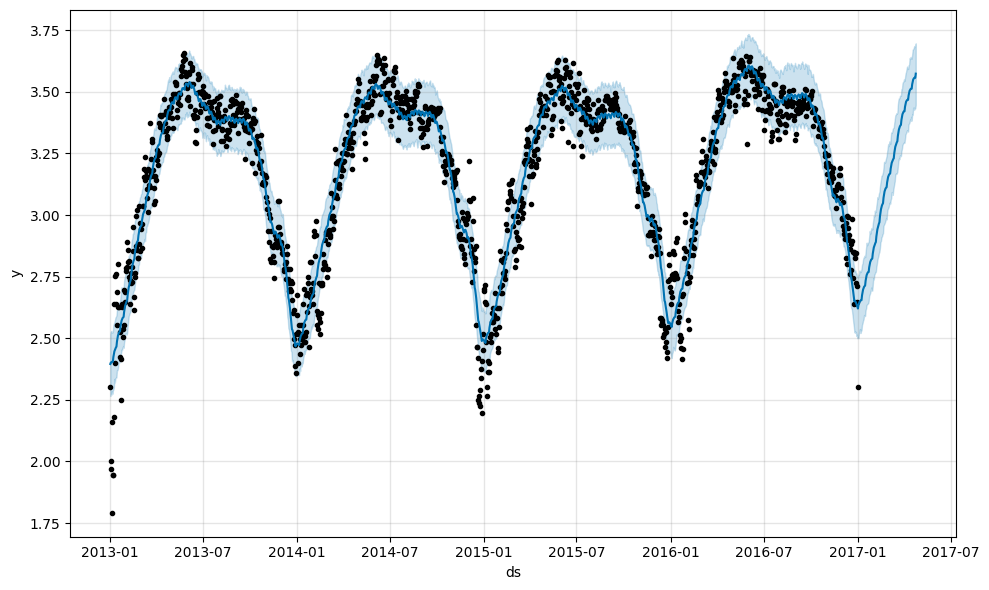

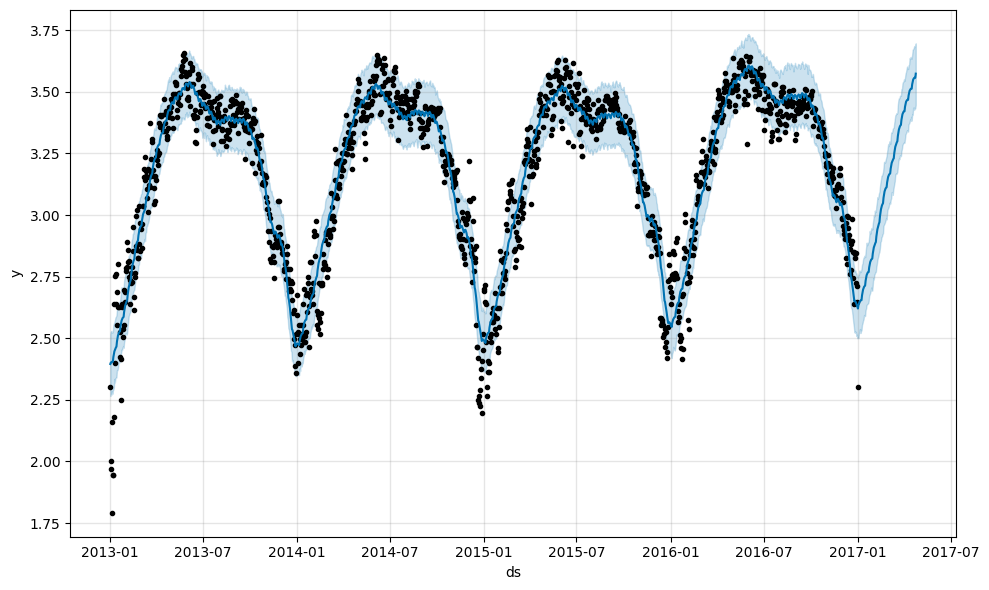

In [ ]:
model.plot(forecast_data)

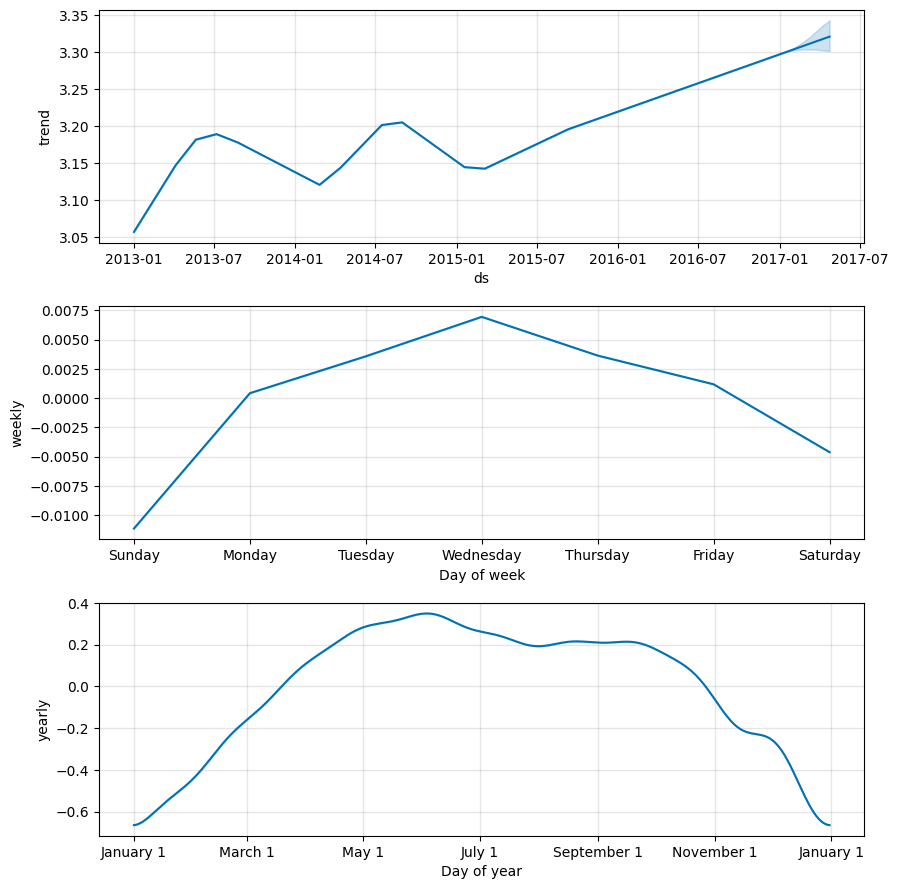

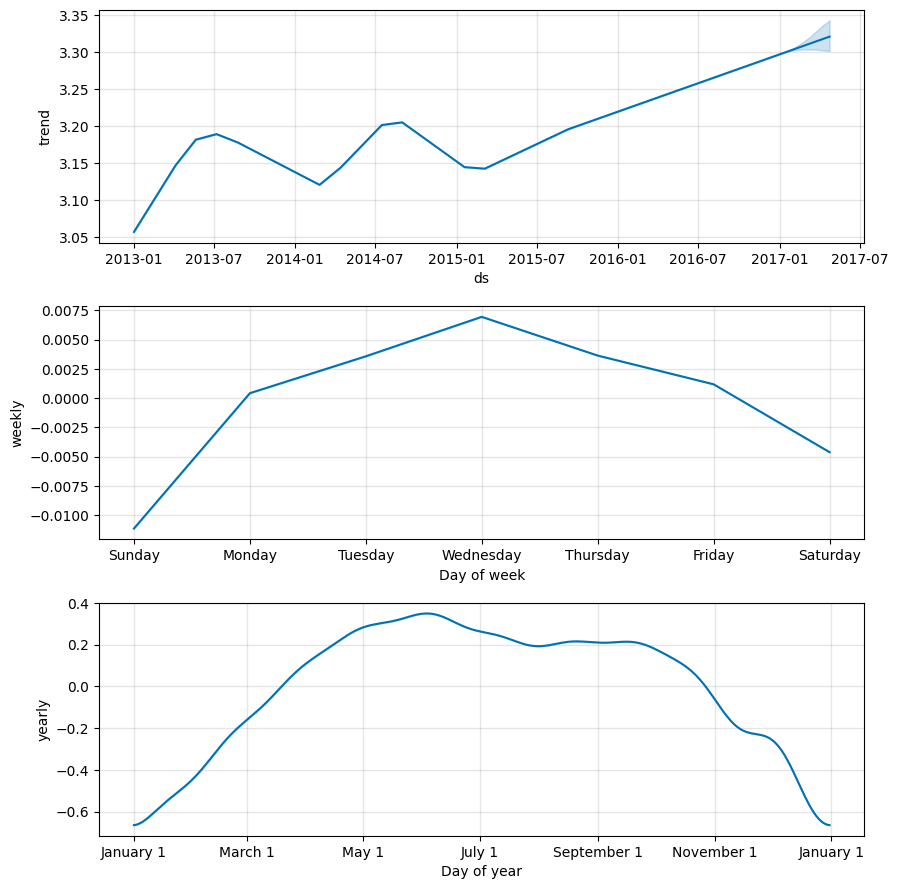

In [ ]:
model.plot_components(forecast_data)

In [ ]:
forecast_data_orig = forecast_data # make sure we save the original forecast data
forecast_data_orig['yhat'] = np.exp(forecast_data_orig['yhat'])
forecast_data_orig['yhat_lower'] = np.exp(forecast_data_orig['yhat_lower'])
forecast_data_orig['yhat_upper'] = np.exp(forecast_data_orig['yhat_upper'])

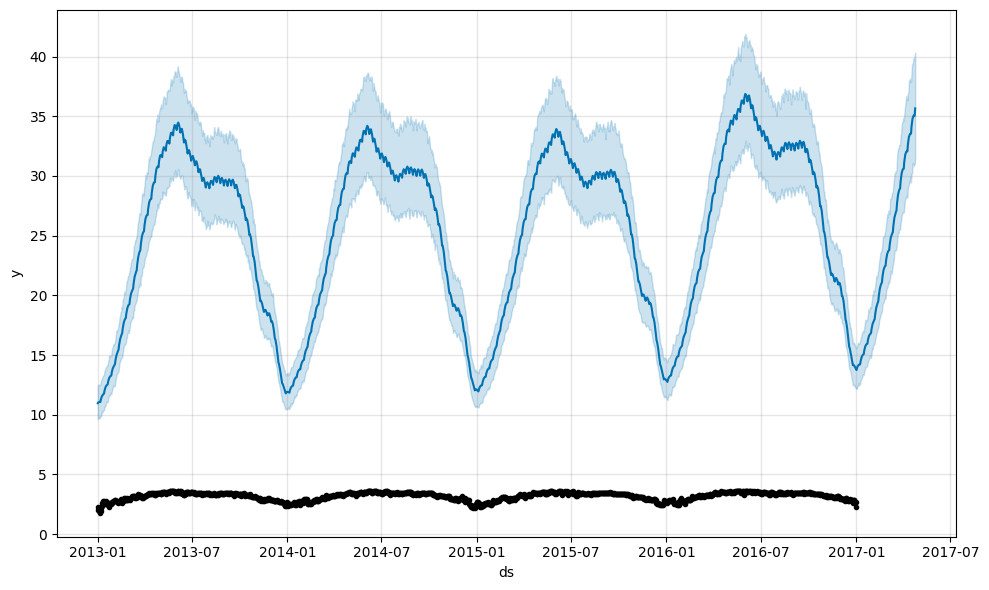

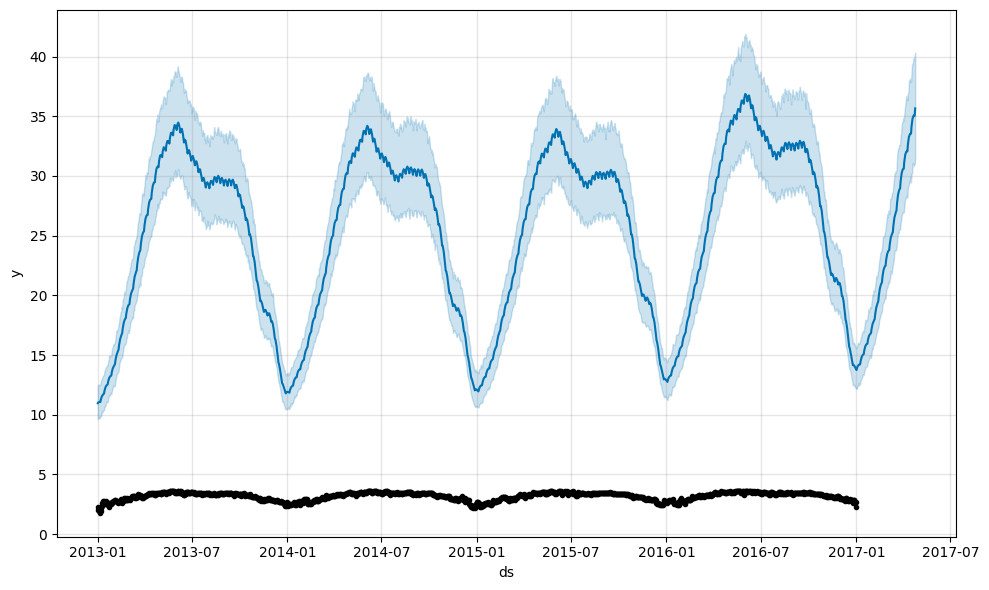

In [ ]:
model.plot(forecast_data_orig)

In [ ]:
df_train['y_log']=df_train['y'] #copy the log-transformed data to another column
df_train['y']=df_train['y_orig']

In [ ]:
final_df = pd.DataFrame(forecast_data_orig)
import plotly.graph_objs as go
import plotly.offline as py
#Plot predicted and actual line graph with X=dates, Y=Outbound
actual_chart = go.Scatter(y=df_train["y_orig"], name= 'Actual')
predict_chart = go.Scatter(y=final_df["yhat"], name= 'Predicted')
predict_chart_upper = go.Scatter(y=final_df["yhat_upper"], name= 'Predicted Upper')
predict_chart_lower = go.Scatter(y=final_df["yhat_lower"], name= 'Predicted Lower')
py.plot([actual_chart, predict_chart, predict_chart_upper, predict_chart_lower])

'temp-plot.html'

In [ ]:
df_test.head(5)

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [ ]:
final_df.tail(113)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1462,2017-01-02,3.297326,12.190692,15.767390,3.297326,3.297326,-0.663317,-0.663317,-0.663317,0.000422,0.000422,0.000422,-0.663740,-0.663740,-0.663740,0.0,0.0,0.0,13.929498
1463,2017-01-03,3.297538,12.427577,15.771440,3.297538,3.297538,-0.657359,-0.657359,-0.657359,0.003575,0.003575,0.003575,-0.660934,-0.660934,-0.660934,0.0,0.0,0.0,14.015706
1464,2017-01-04,3.297749,12.487797,16.043771,3.297749,3.297749,-0.650053,-0.650053,-0.650053,0.006948,0.006948,0.006948,-0.657000,-0.657000,-0.657000,0.0,0.0,0.0,14.121470
1465,2017-01-05,3.297960,12.647954,15.983029,3.297960,3.297960,-0.648426,-0.648426,-0.648426,0.003639,0.003639,0.003639,-0.652065,-0.652065,-0.652065,0.0,0.0,0.0,14.147449
1466,2017-01-06,3.298172,12.448016,15.930257,3.298172,3.298172,-0.645077,-0.645077,-0.645077,0.001183,0.001183,0.001183,-0.646260,-0.646260,-0.646260,0.0,0.0,0.0,14.197910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1570,2017-04-20,3.320161,31.090213,39.581205,3.301948,3.341102,0.233120,0.233120,0.233120,0.003639,0.003639,0.003639,0.229481,0.229481,0.229481,0.0,0.0,0.0,34.927720
1571,2017-04-21,3.320372,30.799399,39.864250,3.301921,3.341584,0.236684,0.236684,0.236684,0.001183,0.001183,0.001183,0.235501,0.235501,0.235501,0.0,0.0,0.0,35.059836
1572,2017-04-22,3.320583,30.940606,39.721829,3.301889,3.342037,0.236755,0.236755,0.236755,-0.004618,-0.004618,-0.004618,0.241373,0.241373,0.241373,0.0,0.0,0.0,35.069745
1573,2017-04-23,3.320795,30.962830,40.045451,3.301816,3.342542,0.235916,0.235916,0.235916,-0.011149,-0.011149,-0.011149,0.247065,0.247065,0.247065,0.0,0.0,0.0,35.047727


In [ ]:
rows = final_df["yhat"].tail(113)

In [ ]:
rows = rows.reset_index()

In [ ]:
rows.pop('index')

,index
0,1462
1,1463
2,1464
3,1465
4,1466
...,...
108,1570
109,1571
110,1572
111,1573


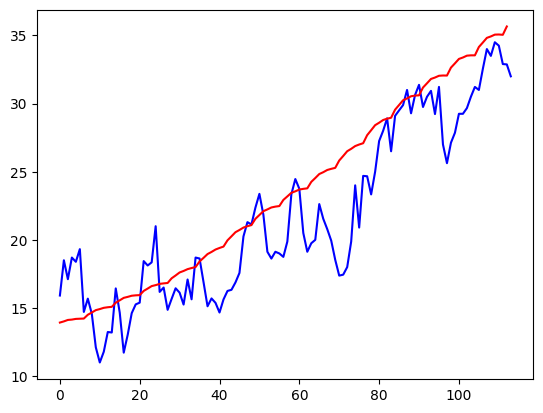

In [ ]:
# plot

import matplotlib.pyplot as plt
plt.plot(df_test['meantemp'], color = 'blue')
plt.plot(rows, color='red')
plt.show()




# Multi-Variate Forecasting

In [ ]:
df_test=pd.read_csv("DailyDelhiClimateTest.csv")
df_train=pd.read_csv("DailyDelhiClimateTrain.csv")
df=df_train
df_train

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [ ]:
df_train = df_train.rename(columns={'meantemp': 'y', 'date':'ds'})
df_train['y_orig'] = df_train['y'] # to save a copy of the original data..you'll see why shortly.
df_train['y'] = np.log(df_train['y'])

In [ ]:
df_train.head(5)

,ds,y,humidity,wind_speed,meanpressure,y_orig
0,2013-01-01,2.302585,84.500000,0.000000,1015.666667,10.000000
1,2013-01-02,2.001480,92.000000,2.980000,1017.800000,7.400000
2,2013-01-03,1.969441,87.000000,4.633333,1018.666667,7.166667
3,2013-01-04,2.159484,71.333333,1.233333,1017.166667,8.666667
4,2013-01-05,1.791759,86.833333,3.700000,1016.500000,6.000000


In [ ]:


model_new = Prophet() #instantiate Prophet
model_new.add_regressor('humidity')
model_new.add_regressor('wind_speed')
model_new.add_regressor('meanpressure')

In [ ]:


model_new.fit(df_train)

''' 'year': 'A',
        'quarter': 'Q',
        'month': 'M',
        'day': 'D',
        'hour': 'H',
        'minute': 'T',
        'second': 'S',
        'millisecond': 'L',
        'microsecond': 'U',
        'nanosecond': 'N'}
'''

#future_data = model.make_future_dataframe(periods=6, freq = 'H')
future_data = model_new.make_future_dataframe(periods=113, freq = 'D')

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbzr_1riw/fnh140ze.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbzr_1riw/u87o_jvz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62919', 'data', 'file=/tmp/tmpbzr_1riw/fnh140ze.json', 'init=/tmp/tmpbzr_1riw/u87o_jvz.json', 'output', 'file=/tmp/tmpbzr_1riw/prophet_modeltyt5eloc/prophet_model-20250807123144.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:31:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:31:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future_data.head(5)

,ds
0,2013-01-01
1,2013-01-02
2,2013-01-03
3,2013-01-04
4,2013-01-05


In [ ]:
df = pd.concat([df, df_test])
df = df.rename(columns={'meantemp': 'y', 'date':'ds'})
future_data=df[['ds', 'humidity', 'wind_speed', 'meanpressure']]

In [ ]:
future_data.head(5)

,ds,humidity,wind_speed,meanpressure
0,2013-01-01,84.500000,0.000000,1015.666667
1,2013-01-02,92.000000,2.980000,1017.800000
2,2013-01-03,87.000000,4.633333,1018.666667
3,2013-01-04,71.333333,1.233333,1017.166667
4,2013-01-05,86.833333,3.700000,1016.500000


In [ ]:
forecast_data = model_new.predict(future_data)

forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
1571,2017-04-20,3.573403,3.465823,3.681432
1572,2017-04-21,3.521899,3.414969,3.625813
1573,2017-04-22,3.517832,3.409216,3.631959
1574,2017-04-23,3.577378,3.457313,3.696197
1575,2017-04-24,3.588265,3.487211,3.700011


In [ ]:
forecast_data

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_additive,...,wind_speed,wind_speed_lower,wind_speed_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,3.041501,2.246587,2.462660,3.041501,3.041501,-0.687563,-0.687563,-0.687563,-0.102653,...,0.009625,0.009625,0.009625,-0.587575,-0.587575,-0.587575,0.0,0.0,0.0,2.353938
1,2013-01-02,3.042590,2.212032,2.424739,3.042590,3.042590,-0.723141,-0.723141,-0.723141,-0.142364,...,0.005409,0.005409,0.005409,-0.584434,-0.584434,-0.584434,0.0,0.0,0.0,2.319449
2,2013-01-03,3.043679,2.225966,2.447338,3.043679,3.043679,-0.702532,-0.702532,-0.702532,-0.121059,...,0.003069,0.003069,0.003069,-0.580021,-0.580021,-0.580021,0.0,0.0,0.0,2.341147
3,2013-01-04,3.044768,2.314480,2.535482,3.044768,3.044768,-0.616329,-0.616329,-0.616329,-0.042127,...,0.007880,0.007880,0.007880,-0.574483,-0.574483,-0.574483,0.0,0.0,0.0,2.428439
4,2013-01-05,3.045857,2.252971,2.463054,3.045857,3.045857,-0.685871,-0.685871,-0.685871,-0.118933,...,0.004390,0.004390,0.004390,-0.567979,-0.567979,-0.567979,0.0,0.0,0.0,2.359985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1571,2017-04-20,3.307933,3.465823,3.681432,3.291834,3.324452,0.265470,0.265470,0.265470,0.159238,...,0.001754,0.001754,0.001754,0.107685,0.107685,0.107685,0.0,0.0,0.0,3.573403
1572,2017-04-21,3.308131,3.414969,3.625813,3.291865,3.324948,0.213768,0.213768,0.213768,0.101075,...,-0.000227,-0.000227,-0.000227,0.112412,0.112412,0.112412,0.0,0.0,0.0,3.521899
1573,2017-04-22,3.308329,3.409216,3.631959,3.291690,3.325423,0.209504,0.209504,0.209504,0.091120,...,-0.002954,-0.002954,-0.002954,0.117344,0.117344,0.117344,0.0,0.0,0.0,3.517832
1574,2017-04-23,3.308526,3.457313,3.696197,3.291640,3.326044,0.268852,0.268852,0.268852,0.152984,...,-0.004472,-0.004472,-0.004472,0.122430,0.122430,0.122430,0.0,0.0,0.0,3.577378


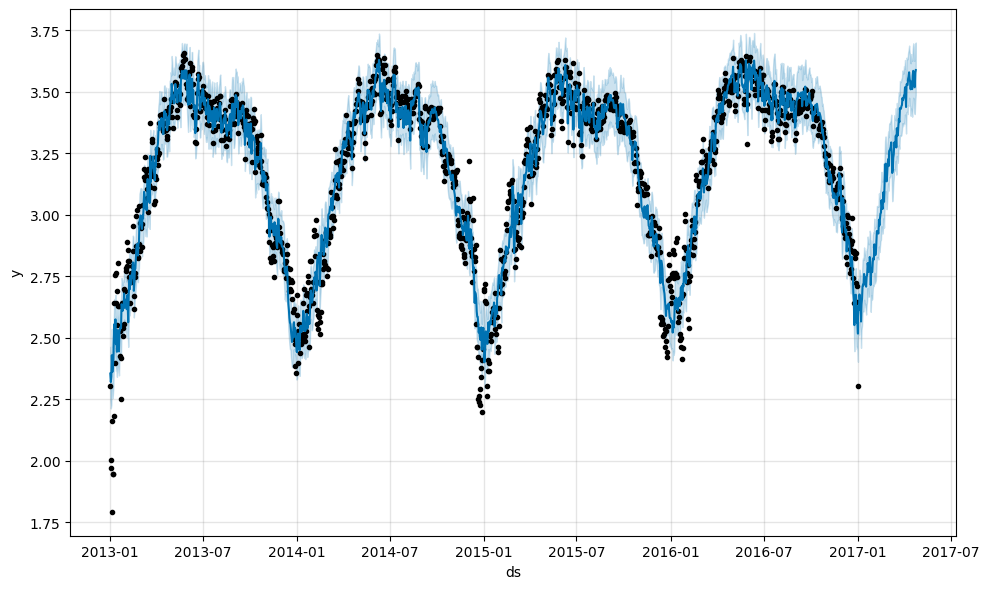

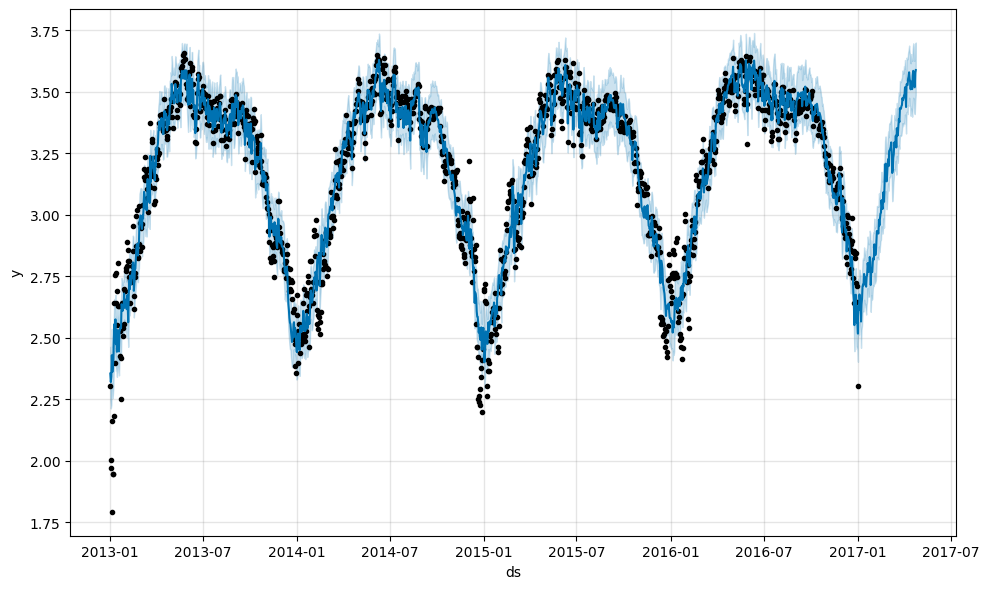

In [ ]:
model_new.plot(forecast_data)


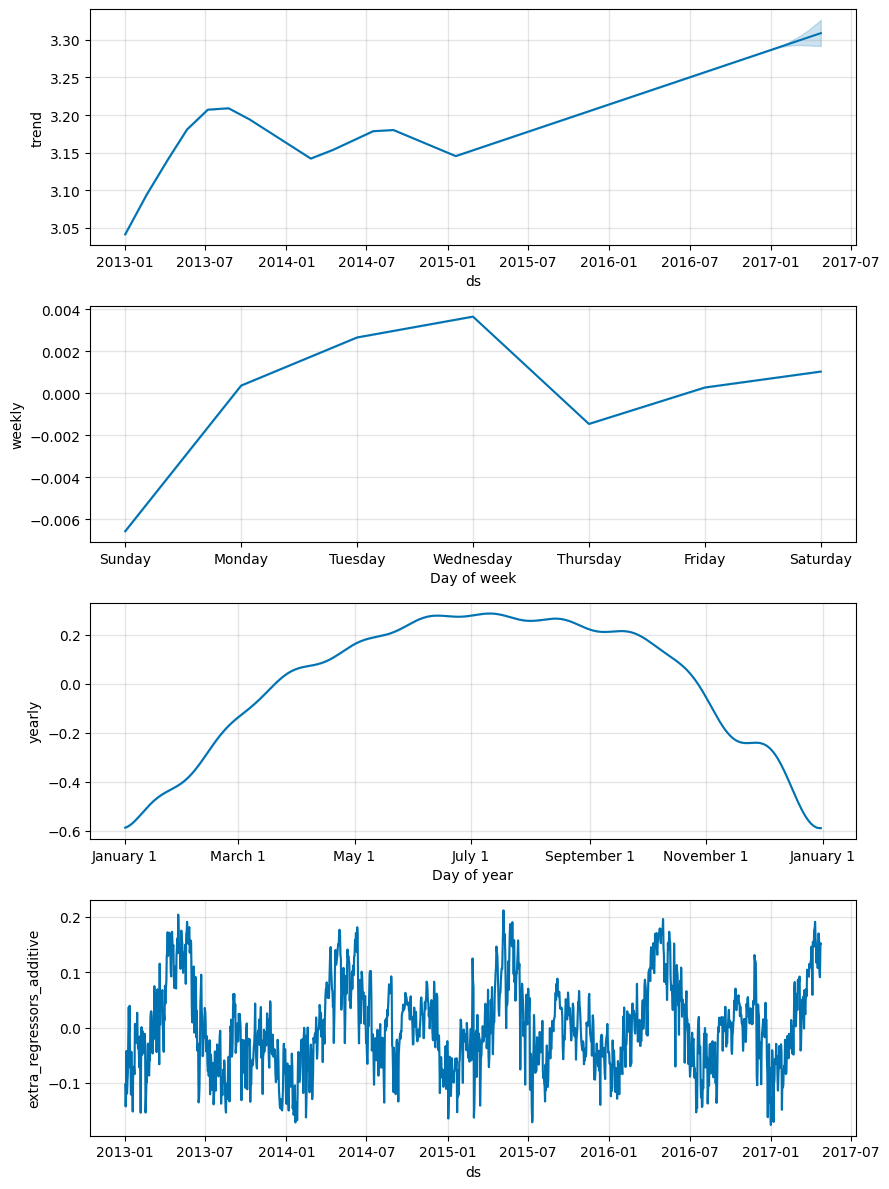

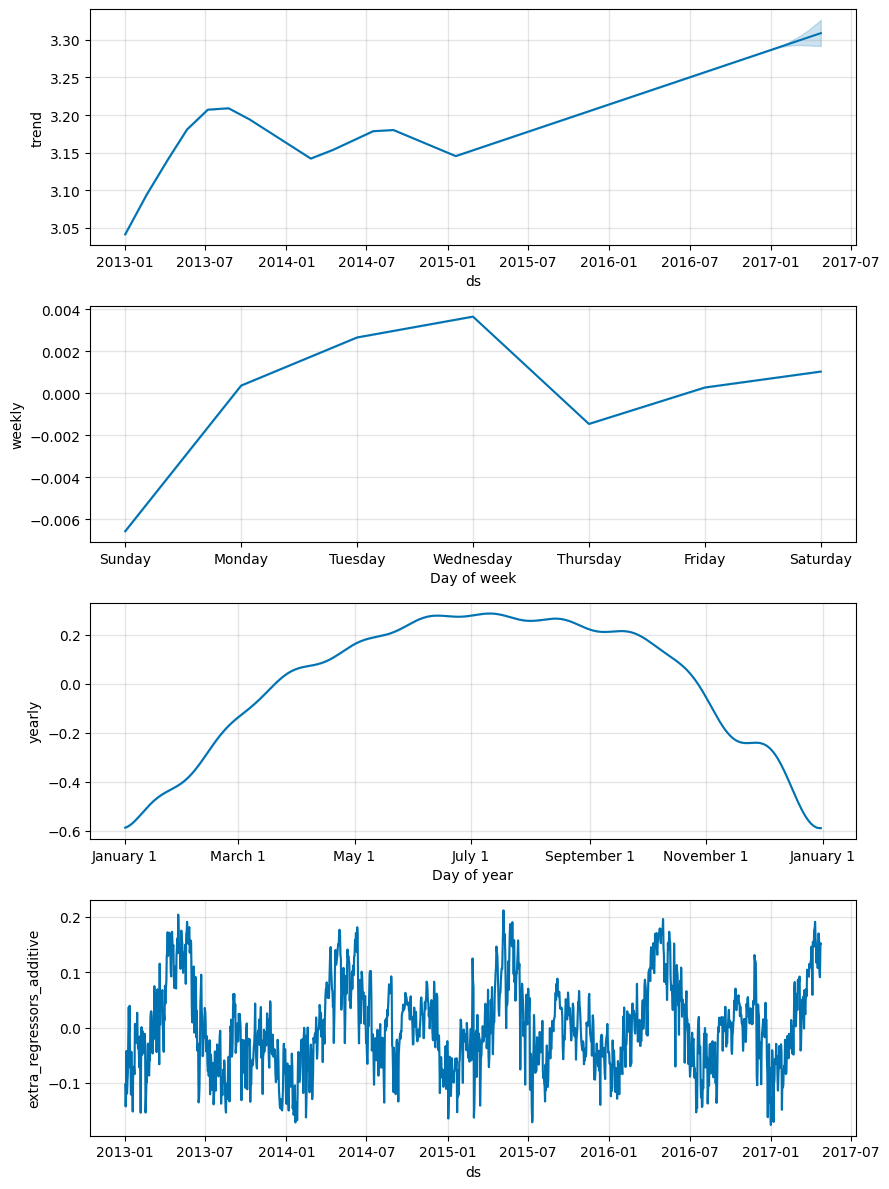

In [ ]:
model_new.plot_components(forecast_data)

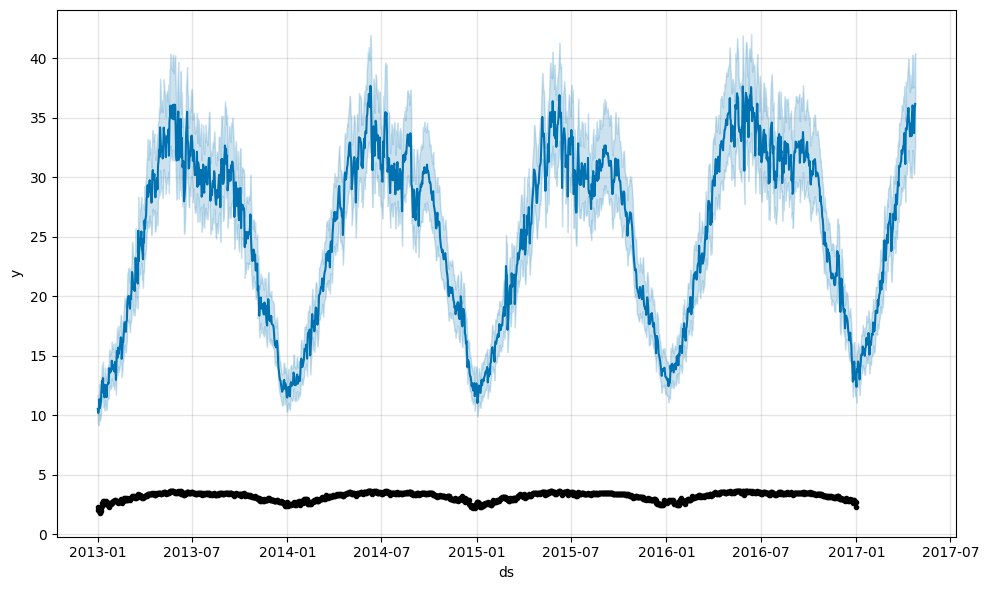

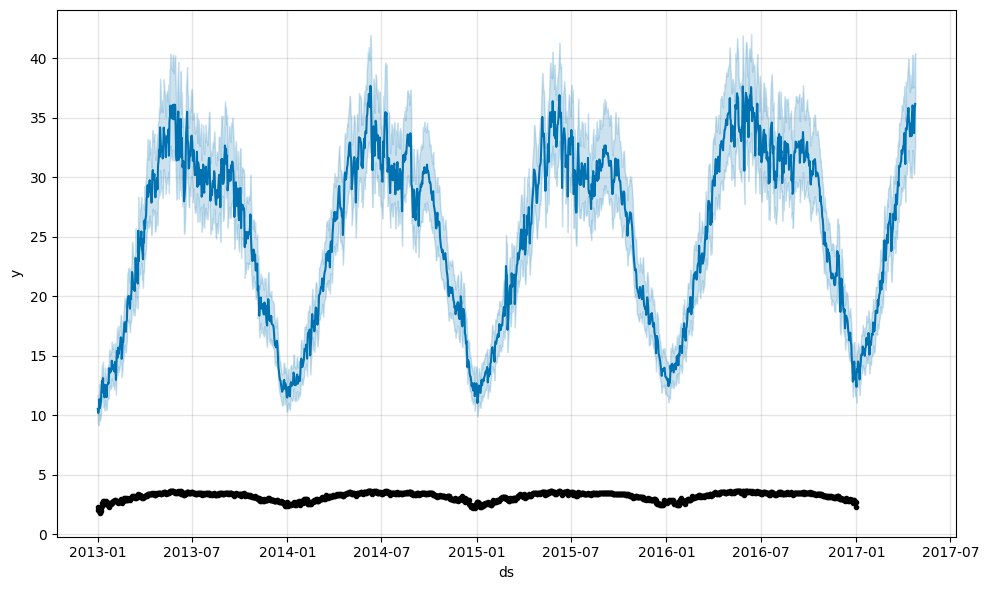

In [ ]:
forecast_data_orig = forecast_data # make sure we save the original forecast data
forecast_data_orig['yhat'] = np.exp(forecast_data_orig['yhat'])
forecast_data_orig['yhat_lower'] = np.exp(forecast_data_orig['yhat_lower'])
forecast_data_orig['yhat_upper'] = np.exp(forecast_data_orig['yhat_upper'])

model_new.plot(forecast_data_orig)

In [ ]:
final_df = pd.DataFrame(forecast_data_orig)
import plotly.graph_objs as go
import plotly.offline as py
#Plot predicted and actual line graph with X=dates, Y=Outbound
actual_chart = go.Scatter(y=df_train["y_orig"], name= 'Actual')
predict_chart = go.Scatter(y=final_df["yhat"], name= 'Predicted')
predict_chart_upper = go.Scatter(y=final_df["yhat_upper"], name= 'Predicted Upper')
predict_chart_lower = go.Scatter(y=final_df["yhat_lower"], name= 'Predicted Lower')
py.plot([actual_chart, predict_chart, predict_chart_upper, predict_chart_lower])

'temp-plot.html'